<div align="center">

# National Tsing Hua University

### Fall 2023

#### 11210IPT 553000

#### Deep Learning in Biomedical Optical Imaging

## Homework 1

</div>


---
## Instructions for Completing the Homework:

1. **Environment Setup**:
   - You have the flexibility to choose your working environment. You can either use [Google Colab](https://colab.research.google.com/) or set up your own local Jupyter Notebook environment.
   - If you're new to Google Colab, it allows you to run Jupyter Notebook in the cloud, eliminating setup time and providing free access to GPUs

2. **Completing the Homework**:
   - Go through the questions provided in the `.ipynb` file and write the necessary code in the designated areas.
   - Make sure to test your solutions thoroughly to ensure they work as expected.

3. **Submission**:
   - After you've completed the homework, commit the `.ipynb` file to your GitHub repository.
   - Ensure that your repository is publicly accessible so that it can be evaluated.

4. **Learning More**:
   - If you need further information or clarification about any `numpy` function, consult [the official numpy documentation](https://docs.scipy.org/doc/numpy/reference/).
   - As a quick hack within this notebook: Create a new cell, type in the function name followed by a `?` (e.g., `np.exp?`), and execute the cell. This will pull up the documentation for the function, giving you a brief overview of its usage and parameters.

Remember, practice is the key to mastering any skill. Make the best use of resources provided and always strive to explore beyond. Good luck! 🍀🌟😺

In [23]:
import numpy as np

---
### ✏️ Question #1 (20pts, each function for 10 pts)

In the landmark paper, _["ImageNet Classification with Deep Convolutional Neural Networks"](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)_, by Alex Krizhevsky et al. explored the utilization of various activation functions. A relevant excerpt from the paper is provided below for reference.

<div style="text-align: center;">
    <img src="https://i.imgur.com/73WP75j.png"  width="600"  alt="Segment from the paper" />
</div>

**Your task**:
1. Carefully analyze the two activation functions highlighted by the red underline in the segment.
2. Utilize `numpy` to code and represent the functions corresponding to these activation functions as described in the paper.


In [ ]:
def func_1(x):
    """
    Compute the output of the first function

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- func_1(x)
    """

    # YOUR CODE STARTS HERE
    s = (np.exp(-x)+1)**(-1)
    # YOUR CODE ENDS HERE

    return s

def func_2(x):
    """
    Compute the output of the second function

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- func_2(x)
    """

    # YOUR CODE STARTS HERE
    s = np.maximum(0,x)
    # YOUR CODE ENDS HERE

    return s

In [ ]:
# This is a test block for verification purposes.
# You don't need to modify anything in this cell.

print(f'func_1: {func_1(np.array([-1, 2, 0]))}')
print(f'func_2: {func_2(np.array([-1, 2, 0]))}')

func_1: [0.26894142 0.88079708 0.5       ]
func_2: [0 2 0]


---
### ✏️ Question #2 (10pts)

The softmax function is commonly used in classification problems, especially for multiclass classification. It squashes a vector of any size into a vector of values between 0 and 1 that sum up to 1. This property makes it useful for interpreting the output values as probabilities.

Given an input **vector** $ z = [z_1, z_2, \dots, z_n] $, the softmax function is defined as:

$$ \sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}} $$

For each $ i $ from 1 to $ n $.

In essence, the softmax function computes the exponential (pointwise) of each element of the input vector and then normalizes it by dividing by the sum of these exponentials. This process ensures that:

1. Each element of the output vector lies between 0 and 1.
2. The sum of the elements of the output vector is 1.

**Your Task**:
1. Implement the softmax function using `numpy`.


In [ ]:
def softmax(z):
    """
    Compute the softmax of vector z.

    Arguments:
    z -- A 1D numpy array.

    Return:
    s -- softmax(z)
    """

    # YOUR CODE STARTS HERE
    z_exp = np.exp(z)
    z_sum = np.sum(np.exp(z))
    s = z_exp/z_sum
    # YOUR CODE ENDS HERE

    return s

In [ ]:
# This is a test block for verification purposes.
# You don't need to modify anything in this cell.

print(f'Softmax Output: {softmax(np.array([-1, 2, 0]))}')

Softmax Output: [0.04201007 0.84379473 0.1141952 ]


---
### ✏️ Question #3 (30pts, each part for 10 pts)

The objective of this question is to understand and implement three commonly used loss functions in machine learning: L1 and L2 Loss measure differences between predicted and actual values; and the Cross-Entropy Loss compares predicted probabilities to actual class labels.

<br/>

#### **Part A: L1 Loss Implementation**

**L1 loss**, often referred to as the absolute error, calculates the absolute differences between the true values and the predictions. It's given by:

$$ \text{L1}(\hat{y}, y) = \sum_{i} |y^{(i)} - \hat{y}^{(i)}| $$

where:

- $ y $ represents the true values.
- $ \hat{y} $ represents the predicted values.

**Your task**:
1. Implement the L1 loss using a numpy vectorized approach. The function `np.abs(x)` may be useful for computing the absolute value of `x`.

<br/>

#### **Part B: L2 Loss Implementation**

**L2 loss**, also known as the squared error, computes the squared differences between the true values and the predictions. It's mathematically expressed as:

$$ \text{L2}(\hat{y},y) = \sum_{i} (y^{(i)} - \hat{y}^{(i)})^2 $$

where:

- $ y $ represents the true values.
- $ \hat{y} $ represents the predicted values.

**Your task**:
1. Implement the L2 loss in a numpy vectorized manner.

<br/>

#### **Part C: Ceoss-Entropy Loss Implementation**
**Cross-Entropy loss** is commonly used in classification problems. It is defined as:

<br/>

$$ \text{CE}(y, \hat{y}) = -\sum_{i} y^{(i)} \log(\hat{y}^{(i)} + \epsilon)\ $$
where:

- $ y $ is the true distribution (the ground truth labels) in a shape (1, num_class), and $i$ specifies the index of the class.
- $ \hat{y} $ is the predicted distribution (the predictions from your model), also in a shape (1, num_class)
- The sum is taken over all the classes.
- Note the $\epsilon$ is applied to prevent the $\log()$ outputs negative infinity.

**Your task**:
1. Implement the CE loss in a numpy vectorized manner.
<br/>

In [ ]:
def L1(yhat, y):
    """
    Compute the L1 loss.

    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)

    Returns:
    loss -- the value of the L1 loss function defined above
    """

    # YOUR CODE STARTS HERE
    loss = np.sum(np.absolute(y-yhat))
    # YOUR CODE ENDS HERE

    return loss


def L2(yhat, y):
    """
    Compute the L2 loss.

    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)

    Returns:
    loss -- the value of the L2 loss function defined above
    """

    # YOUR CODE STARTS HERE
    loss = np.sum(np.absolute(y-yhat)**2)
    # YOUR CODE ENDS HERE

    return loss


def CE(yhat, y, epsilon=1e-6):
    """
    Compute the cross entropy loss

    Arguments:
    yhat -- vector of size m (predicted distributon)
    y -- vector of size m (true labels)

    Returns:
    loss -- the value of the cross entropy loss function defined above
    """
    # YOUR CODE STARTS HERE
    loss = -np.sum(y*np.log(yhat+epsilon))
    # YOUR CODE ENDS HERE
    return loss

In [ ]:
# This is a test block for verification purposes.
# You don't need to modify anything in this cell.

yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])

print(f'L1: {L1(yhat, y)}')
print(f'L2: {L2(yhat, y)}')

phat = np.array([[0.9, 0.05, 0.05], [0.1, 0.8, 0.1]])
y = np.array([[1, 0, 0], [0, 1, 0]])
print(f'CE: {CE(phat, y)}')

L1: 1.1
L2: 0.43
CE: 0.3285017058623233


---
### ✏️ Question #4 (20pts, each step for 5 pts)

   Batch normalization, introduced in the paper _["Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift"](https://arxiv.org/abs/1502.03167)_ by S. Ioffe et al., serves as a cornerstone technique in deep learning. It standardizes the inputs of each layer, thus enhancing the efficiency of network learning. The primary motive behind its inception was to counter the internal covariate shift dilemma. By normalizing activations across the network, batch normalization not only enhances training speed but also bolsters model performance.

In this exercise, you are tasked to implement **Algorithm 1** presented in the paper shown below. **Note that this algorithm is applied differently during training and inference.** For further details, please refer to Algorithm 2 in the paper.


<div style="text-align: center;">
    <img src="https://i.imgur.com/vHCVvBj.png"  width="400"  alt="centered image" />
</div>


Below are the steps for **Algorithm 1**:

**Input:**
- Mini-batch of input values: $B = \{x_1, x_2, ..., x_m\}$
- Parameters to learn: $\gamma$, $\beta$

**Output:**
- Batch-normalized values: $y_i = BN_{\gamma,\beta}(x_i)$

**Steps:**

1. **Compute the mini-batch mean:**  
   $$
   \mu_B = \frac{1}{m} \sum_{i=1}^{m} x_i
   $$

2. **Compute the mini-batch variance:**  
   $$
   \sigma^2_B = \frac{1}{m} \sum_{i=1}^{m} (x_i - \mu_B)^2
   $$

3. **Normalize the values:**  
   Use the mean and variance to normalize the values in the mini-batch. Add a small constant, $ \epsilon $, for numerical stability.
   $$
   \hat{x}_{i} = \frac{x_i - \mu_B}{\sqrt{\sigma^2_B + \epsilon}}
   $$

4. **Scale and Shift:**  
   Use the parameters $ \gamma $ and $ \beta $ to scale and shift the normalized values.
   $$
   y_i = \gamma \hat{x}_{i} + \beta \equiv BN_{\gamma,\beta}(x_i)
   $$

**Notes:**

1. Do not use any deep learning frameworks or in-built batch normalization functions.
2. Make sure to incorporate the small constant $ \epsilon $ during normalization to avoid division by zero.

**Your Task:**

1. Following the steps provided above, write the code to implement the Batch Normalization algorithm. Make sure to consider the notes and constraints while working on your solution.


In [ ]:
import numpy as np

def batch_normalization(B, gamma, beta, epsilon=1e-6):
    """
    Apply Batch Normalization as per the given algorithm.

    Arguments:
    B       -- numpy array of any shape, the input mini-batch
    gamma   -- numpy array of shape matching B's, scale parameter
    beta    -- numpy array of shape matching B's, shift parameter
    epsilon -- small constant for numerical stability (default is 1e-6)

    Returns:
    y_i     -- batch-normalized values
    """

    # Step 1: Compute the mini-batch mean
    mu_B = (1/np.size(B))*np.sum(B)

    # Step 2: Compute the mini-batch variance
    sigma_B = (1/np.size(B))*np.sum((B-mu_B)**2)

    # Step 3: Normalize
    x_hat = (B-mu_B)/np.sqrt(sigma_B+epsilon)

    # Step 4: Scale and shift
    y_i = (gamma*x_hat)+beta

    return y_i

In [ ]:
# This is a test block for verification purposes.
# You don't need to modify anything in this cell.

B = np.array([10, 20, 30, 40, 50])
gamma = 1.0
beta = 0.0

print(batch_normalization(B, gamma, beta))

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


---
### ✏️ Question #5 (20pts, each step for 5 pts)

In image processing tasks, often you'll find yourself needing to convert between different color spaces. OpenCV reads images in BGR (Blue, Green, Red) format by default. However, many image processing libraries (including matplotlib, which you might use for displaying images) expect the channels to be in RGB (Red, Green, Blue) format. Thus, converting between these formats is a common task.

**Notes**:
- You need to upload **'hw1_img.jpg'** into your environment.
- Ensure you handle the image channels correctly during conversion.
- Replace all **...** in the code with your implementations.

**Your task**:
1. Read the image **'hw1_img.jpg'**. Ensure your image path is correct.
2. Convert the image from BGR to RGB. You should NOT use any in-built OpenCV functions for this conversion. Instead, use numpy operations to rearrange the channels.
3. Print the shape of the image, displaying the height, width, and the number of channels (depth).
4. Crop the region you are interested in (region of interested, ROI), then show it.

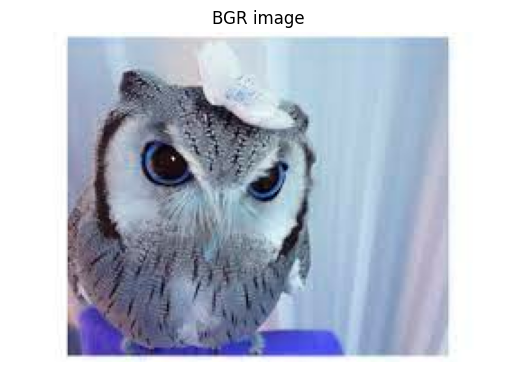

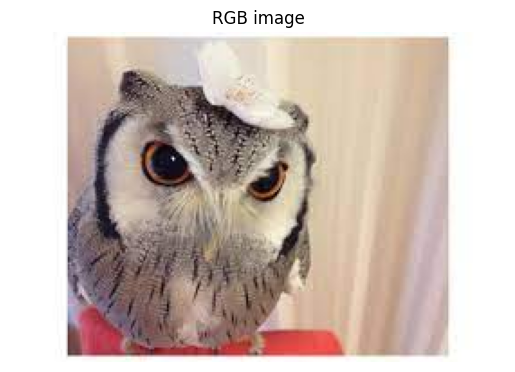

The shape of this image is: (183, 275, 3)


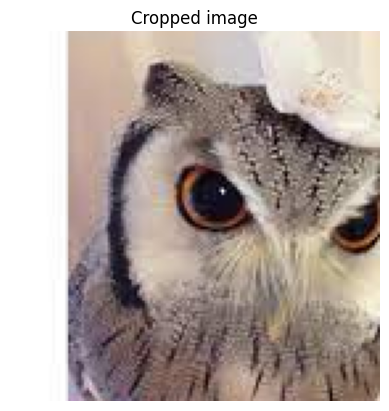

In [3]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Specify the path to your image file
image_path = "/content/貓頭鷹.jpg"

# Read the image using cv2
img = cv2.imread(image_path)

# Display the BGR image
plt.imshow(img)
plt.title('BGR image')
plt.axis('off')
plt.show()

# Step 2: Convert the BGR image to RGB using numpy
image_rgb = img[:,:,::-1]

# Display the RGB image
plt.imshow(image_rgb)
plt.title('RGB image')
plt.axis('off')
plt.show()

# Step 3: Print the shape of the RGB image
print(f'The shape of this image is: {image_rgb.shape}')

# Step 4 Display the cropped image.
plt.imshow(image_rgb[10:150,10:150,:])
plt.title('Cropped image')
plt.axis('off')
plt.show()